In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from torch.utils.data.sampler import SubsetRandomSampler

In [2]:
#Multi-Layer Perceptron Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 256)
        self.fc3 = nn.Linear(256, 10)
        

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


MLP_network = MLP()

In [3]:
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(MLP_network.parameters(), lr=0.001, betas=(0.9,0.99), eps=1e-08, weight_decay=0.001) 

In [4]:
# transforms to apply to the mnist data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# MNIST dataset
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)


In [5]:
num_train = len(mnist_trainset)
indices = list(range(num_train))
#Splitting the Dataset into 10% Training set and 90% Validation Set
split = 54000

# Random, non-contiguous split
validation_idx = np.random.choice(indices, size=split, replace=False)
train_idx = list(set(indices) - set(validation_idx))

# Contiguous split
# train_idx, validation_idx = indices[split:], indices[:split]

## define our samplers -- we use a SubsetRandomSampler because it will return
## a random subset of the split defined by the given indices without replaf
train_sampler = SubsetRandomSampler(train_idx)
validation_sampler = SubsetRandomSampler(validation_idx)

train_load1 = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, sampler=train_sampler)

validation_load1 = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, sampler=validation_sampler)


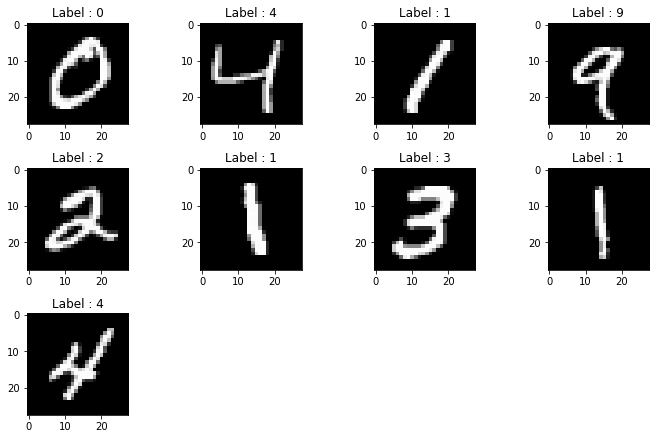

In [6]:
fig = plt.figure(figsize=(10,10));
columns = 4;
rows = 5;
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(mnist_trainset.train_data[i].numpy(), cmap='gray')
    plt.title('Label : %i' % mnist_trainset.train_labels[i])
plt.show()

In [7]:
#MLP on 10% of the Training Dataset
num_epochs = 20
total_step = len(train_load1)
Loss_1 = []
print('----------------------------------------------------')
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_load1, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = MLP_network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}  | Loss : {:.4f}'.format(epoch+1, running_loss / total_step))        
    print('----------------------------------------------------')
    Loss_1.append(running_loss / total_step)
print('Finished Training')

----------------------------------------------------
Epoch 1  | Loss : 0.4912
----------------------------------------------------
Epoch 2  | Loss : 0.2409
----------------------------------------------------
Epoch 3  | Loss : 0.1674
----------------------------------------------------
Epoch 4  | Loss : 0.1427
----------------------------------------------------
Epoch 5  | Loss : 0.1136
----------------------------------------------------
Epoch 6  | Loss : 0.1010
----------------------------------------------------
Epoch 7  | Loss : 0.0781
----------------------------------------------------
Epoch 8  | Loss : 0.0806
----------------------------------------------------
Epoch 9  | Loss : 0.0772
----------------------------------------------------
Epoch 10  | Loss : 0.0767
----------------------------------------------------
Epoch 11  | Loss : 0.0558
----------------------------------------------------
Epoch 12  | Loss : 0.0675
----------------------------------------------------
Epoch 13

In [8]:
#Accuracy of 90% of the Validation Test Dataset
correct = 0
total = 0
with torch.no_grad():
    for data in validation_load1:
        images, labels = data
        outputs = MLP_network(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 54000 Test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 54000 Test images: 94 %


In [9]:
classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in validation_load1:
        images, labels = data
        outputs = MLP_network(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of class %s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of class 0 : 97 %
Accuracy of class 1 : 98 %
Accuracy of class 2 : 93 %
Accuracy of class 3 : 90 %
Accuracy of class 4 : 96 %
Accuracy of class 5 : 96 %
Accuracy of class 6 : 96 %
Accuracy of class 7 : 97 %
Accuracy of class 8 : 82 %
Accuracy of class 9 : 89 %


In [10]:
num_train = len(mnist_trainset)
indices = list(range(num_train))
#Splitting the Dataset into 20% Training set and 80% Validation Set
split = 48000

# Random, non-contiguous split
validation_idx = np.random.choice(indices, size=split, replace=False)
train_idx = list(set(indices) - set(validation_idx))

# Contiguous split
# train_idx, validation_idx = indices[split:], indices[:split]

## define our samplers -- we use a SubsetRandomSampler because it will return
## a random subset of the split defined by the given indices without replaf
train_sampler = SubsetRandomSampler(train_idx)
validation_sampler = SubsetRandomSampler(validation_idx)

train_load2 = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, sampler=train_sampler)

validation_load2 = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, sampler=validation_sampler)



In [11]:
#MLP on 20% of the Training Dataset
num_epochs = 20
total_step = len(train_load2)
Loss_2 = []
print('----------------------------------------------------')
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_load2, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = MLP_network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}  | Loss : {:.4f}'.format(epoch+1, running_loss / total_step))        
    print('----------------------------------------------------')
    Loss_2.append(running_loss / total_step)
print('Finished Training')

----------------------------------------------------
Epoch 1  | Loss : 0.1772
----------------------------------------------------
Epoch 2  | Loss : 0.1238
----------------------------------------------------
Epoch 3  | Loss : 0.1011
----------------------------------------------------
Epoch 4  | Loss : 0.0947
----------------------------------------------------
Epoch 5  | Loss : 0.0763
----------------------------------------------------
Epoch 6  | Loss : 0.0722
----------------------------------------------------
Epoch 7  | Loss : 0.0665
----------------------------------------------------
Epoch 8  | Loss : 0.0679
----------------------------------------------------
Epoch 9  | Loss : 0.0645
----------------------------------------------------
Epoch 10  | Loss : 0.0619
----------------------------------------------------
Epoch 11  | Loss : 0.0605
----------------------------------------------------
Epoch 12  | Loss : 0.0604
----------------------------------------------------
Epoch 13

In [12]:
#Accuracy of 80% of the Validation Test Dataset
correct = 0
total = 0
with torch.no_grad():
    for data in validation_load2:
        images, labels = data
        outputs = MLP_network(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 48000 Test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 48000 Test images: 95 %


In [13]:
classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in validation_load2:
        images, labels = data
        outputs = MLP_network(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of class %s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of class 0 : 97 %
Accuracy of class 1 : 97 %
Accuracy of class 2 : 95 %
Accuracy of class 3 : 95 %
Accuracy of class 4 : 97 %
Accuracy of class 5 : 92 %
Accuracy of class 6 : 97 %
Accuracy of class 7 : 95 %
Accuracy of class 8 : 96 %
Accuracy of class 9 : 90 %


In [14]:
num_train = len(mnist_trainset)
indices = list(range(num_train))
#Splitting the Dataset into 30% Training set and 70% Validation Set
split = 42000

# Random, non-contiguous split
validation_idx = np.random.choice(indices, size=split, replace=False)
train_idx = list(set(indices) - set(validation_idx))

# Contiguous split
# train_idx, validation_idx = indices[split:], indices[:split]

## define our samplers -- we use a SubsetRandomSampler because it will return
## a random subset of the split defined by the given indices without replaf
train_sampler = SubsetRandomSampler(train_idx)
validation_sampler = SubsetRandomSampler(validation_idx)

train_load3 = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, sampler=train_sampler)

validation_load3 = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, sampler=validation_sampler)


In [15]:
#MLP on 30% of the Training Dataset
num_epochs = 20
total_step = len(train_load3)
Loss_3 = []
print('----------------------------------------------------')
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_load3, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = MLP_network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}  | Loss : {:.4f}'.format(epoch+1, running_loss / total_step))        
    print('----------------------------------------------------')
    Loss_3.append(running_loss / total_step)
print('Finished Training')

----------------------------------------------------
Epoch 1  | Loss : 0.1398
----------------------------------------------------
Epoch 2  | Loss : 0.1025
----------------------------------------------------
Epoch 3  | Loss : 0.0922
----------------------------------------------------
Epoch 4  | Loss : 0.0823
----------------------------------------------------
Epoch 5  | Loss : 0.0807
----------------------------------------------------
Epoch 6  | Loss : 0.0761
----------------------------------------------------
Epoch 7  | Loss : 0.0737
----------------------------------------------------
Epoch 8  | Loss : 0.0716
----------------------------------------------------
Epoch 9  | Loss : 0.0693
----------------------------------------------------
Epoch 10  | Loss : 0.0671
----------------------------------------------------
Epoch 11  | Loss : 0.0681
----------------------------------------------------
Epoch 12  | Loss : 0.0680
----------------------------------------------------
Epoch 13

In [16]:
#Accuracy of 70% of the Validation Test Dataset
correct = 0
total = 0
with torch.no_grad():
    for data in validation_load3:
        images, labels = data
        outputs = MLP_network(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 42000 Test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 42000 Test images: 95 %


In [17]:
classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in validation_load3:
        images, labels = data
        outputs = MLP_network(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of class %s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of class 0 : 98 %
Accuracy of class 1 : 97 %
Accuracy of class 2 : 94 %
Accuracy of class 3 : 92 %
Accuracy of class 4 : 96 %
Accuracy of class 5 : 96 %
Accuracy of class 6 : 97 %
Accuracy of class 7 : 94 %
Accuracy of class 8 : 97 %
Accuracy of class 9 : 95 %


In [18]:
num_train = len(mnist_trainset)
indices = list(range(num_train))
#Splitting the Dataset into 40% Training set and 60% Validation Set
split = 36000

# Random, non-contiguous split
validation_idx = np.random.choice(indices, size=split, replace=False)
train_idx = list(set(indices) - set(validation_idx))

# Contiguous split
# train_idx, validation_idx = indices[split:], indices[:split]

## define our samplers -- we use a SubsetRandomSampler because it will return
## a random subset of the split defined by the given indices without replaf
train_sampler = SubsetRandomSampler(train_idx)
validation_sampler = SubsetRandomSampler(validation_idx)

train_load4 = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, sampler=train_sampler)

validation_load4 = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, sampler=validation_sampler)



In [19]:
#MLP on 40% of the Training Dataset
num_epochs = 20
total_step = len(train_load4)
Loss_4 = []
print('----------------------------------------------------')
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_load4, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = MLP_network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}  | Loss : {:.4f}'.format(epoch+1, running_loss / total_step))        
    print('----------------------------------------------------')
    Loss_4.append(running_loss / total_step)
print('Finished Training')

----------------------------------------------------
Epoch 1  | Loss : 0.1227
----------------------------------------------------
Epoch 2  | Loss : 0.0976
----------------------------------------------------
Epoch 3  | Loss : 0.0879
----------------------------------------------------
Epoch 4  | Loss : 0.0859
----------------------------------------------------
Epoch 5  | Loss : 0.0826
----------------------------------------------------
Epoch 6  | Loss : 0.0802
----------------------------------------------------
Epoch 7  | Loss : 0.0792
----------------------------------------------------
Epoch 8  | Loss : 0.0774
----------------------------------------------------
Epoch 9  | Loss : 0.0745
----------------------------------------------------
Epoch 10  | Loss : 0.0778
----------------------------------------------------
Epoch 11  | Loss : 0.0723
----------------------------------------------------
Epoch 12  | Loss : 0.0722
----------------------------------------------------
Epoch 13

In [20]:
#Accuracy of 60% of the Validation Test Dataset
correct = 0
total = 0
with torch.no_grad():
    for data in validation_load4:
        images, labels = data
        outputs = MLP_network(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 36000 Test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 36000 Test images: 96 %


In [21]:
classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in validation_load4:
        images, labels = data
        outputs = MLP_network(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of class %s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of class 0 : 95 %
Accuracy of class 1 : 97 %
Accuracy of class 2 : 98 %
Accuracy of class 3 : 93 %
Accuracy of class 4 : 97 %
Accuracy of class 5 : 93 %
Accuracy of class 6 : 99 %
Accuracy of class 7 : 96 %
Accuracy of class 8 : 95 %
Accuracy of class 9 : 93 %


In [22]:
num_train = len(mnist_trainset)
indices = list(range(num_train))
#Splitting the Dataset into 50% Training set and 50% Validation Set
split = 30000

# Random, non-contiguous split
validation_idx = np.random.choice(indices, size=split, replace=False)
train_idx = list(set(indices) - set(validation_idx))

# Contiguous split
# train_idx, validation_idx = indices[split:], indices[:split]

## define our samplers -- we use a SubsetRandomSampler because it will return
## a random subset of the split defined by the given indices without replaf
train_sampler = SubsetRandomSampler(train_idx)
validation_sampler = SubsetRandomSampler(validation_idx)

train_load5 = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, sampler=train_sampler)

validation_load5 = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, sampler=validation_sampler)

In [40]:
#MLP on 50% of the Training Dataset
num_epochs = 20
total_step = len(train_load5)
Loss_5 = []
print('----------------------------------------------------')
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_load5, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = MLP_network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}  | Loss : {:.4f}'.format(epoch+1, running_loss / total_step))        
    print('----------------------------------------------------')
    Loss_5.append(running_loss / total_step)
print('Finished Training')

----------------------------------------------------
Epoch 1  | Loss : 0.1091
----------------------------------------------------
Epoch 2  | Loss : 0.0945
----------------------------------------------------
Epoch 3  | Loss : 0.0868
----------------------------------------------------
Epoch 4  | Loss : 0.0841
----------------------------------------------------
Epoch 5  | Loss : 0.0866
----------------------------------------------------
Epoch 6  | Loss : 0.0811
----------------------------------------------------
Epoch 7  | Loss : 0.0787
----------------------------------------------------
Epoch 8  | Loss : 0.0801
----------------------------------------------------
Epoch 9  | Loss : 0.0803
----------------------------------------------------
Epoch 10  | Loss : 0.0788
----------------------------------------------------
Epoch 11  | Loss : 0.0800
----------------------------------------------------
Epoch 12  | Loss : 0.0782
----------------------------------------------------
Epoch 13

In [41]:
#Accuracy of 50% of the Validation Test Dataset
correct = 0
total = 0
with torch.no_grad():
    for data in validation_load5:
        images, labels = data
        outputs = MLP_network(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 30000 Test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 30000 Test images: 95 %


In [42]:
classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in validation_load5:
        images, labels = data
        outputs = MLP_network(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of class %s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of class 0 : 97 %
Accuracy of class 1 : 98 %
Accuracy of class 2 : 97 %
Accuracy of class 3 : 96 %
Accuracy of class 4 : 91 %
Accuracy of class 5 : 95 %
Accuracy of class 6 : 93 %
Accuracy of class 7 : 93 %
Accuracy of class 8 : 96 %
Accuracy of class 9 : 96 %


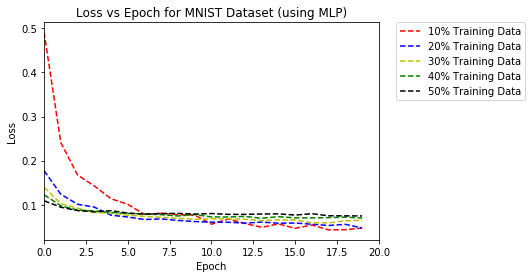

In [43]:
plt.plot(Loss_1, 'r--', label = "10% Training Data")
plt.plot(Loss_2, 'b--', label = "20% Training Data")
plt.plot(Loss_3, 'y--', label = "30% Training Data")
plt.plot(Loss_4, 'g--', label = "40% Training Data")
plt.plot(Loss_5, 'k--', label = "50% Training Data")
plt.title("Loss vs Epoch for MNIST Dataset (using MLP)")
plt.xlim([0, num_epochs])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()